# Código general

## Librerias

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%matplotlib inline
!pip install mne
!pip install fooof
!pip install fieldtrip2mne
!pip install pywavelets

     |████████████████████████████████| 7.4 MB 30.7 MB/s 
     |████████████████████████████████| 112 kB 31.5 MB/s 
  Created wheel for fieldtrip2mne: filename=fieldtrip2mne-0.0.7-py3-none-any.whl size=8654 sha256=6ecd1a28e68ad43bd7a656531162b17f1894832db87686194c3f8d3362b8779d
  Stored in directory: /root/.cache/pip/wheels/7d/e0/76/d2d7566a1c2e387d467fc7564291f2c135ad7619bec3ebcc38
  Created wheel for pymatreader: filename=pymatreader-0.0.26-py3-none-any.whl size=8689 sha256=c9b562cf9c0240c3b70e325a2d8711e9be0c5aa644816596d323ff72d2520354
  Stored in directory: /root/.cache/pip/wheels/75/46/9c/065361ed8d993ff3f69637d0e9ad3513039153bc322ff6361a
Successfully built fieldtrip2mne pymatreader


In [4]:
#manejo de elemeotos del sistema, como carpetas
import scipy.io as sio;
import numpy as np;
from numpy.linalg import matrix_rank
import glob
import os
import copy
import pickle
import h5py
from pandas import HDFStore


# General imports
import matplotlib.pyplot as plt
from matplotlib import cm, colors, colorbar
import pandas as pd


#importamos la rutina de welch
from scipy.signal import welch as pwelch
from scipy.signal import butter, lfilter
import pywt


# Import MNE, as well as the MNE sample dataset
import mne
from mne import io
import tarfile
from fieldtrip2mne import read_epoched

# FOOOF imports
from fooof import FOOOFGroup
from fooof.bands import Bands
from fooof.analysis import get_band_peak_fg
from fooof.plts.spectra import plot_spectrum


fs = 500;

## Cargar archivos

In [5]:
your_path = '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto'

In [6]:
prep_path = your_path + '/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Preprocesados/'
os.makedirs(prep_path,exist_ok=True)
raw_path = your_path + '/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Crudos/'

In [7]:
download_links_prep=['https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032301.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032302.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032303.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032304.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032305.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032306.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032307.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032308.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032309.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032310.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032311.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032312.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032313.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032314.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032315.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032316.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032317.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032318.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032319.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032320.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032321.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032322.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032323.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032324.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032325.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032326.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032327.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032328.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032329.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032330.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032331.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032332.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032333.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032334.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032336.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032337.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032338.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032339.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032340.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032341.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032342.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032343.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032344.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032345.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032346.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032347.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032348.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032349.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032350.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032351.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032352.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032353.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032354.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032355.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032356.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032357.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032358.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032359.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032360.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032361.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032362.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032363.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032364.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032365.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032366.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032367.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032368.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032369.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032370.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032371.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032372.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032373.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032374.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032375.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032376.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032377.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032378.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032379.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032380.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032381.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032382.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032383.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032385.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032386.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032387.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032388.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032389.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032390.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032391.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032392.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032393.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032394.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032395.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032396.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032397.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032398.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032399.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032400.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032401.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032402.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032403.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032405.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032406.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032407.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032408.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032409.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032410.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032411.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032412.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032413.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032414.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032415.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032416.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032417.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032418.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032419.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032420.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032421.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032422.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032423.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032424.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032425.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032426.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032427.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032428.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032429.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032430.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032431.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032432.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032434.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032435.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032436.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032438.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032439.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032440.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032441.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032442.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032444.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032446.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032447.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032448.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032449.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032450.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032451.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032452.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032453.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032454.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032455.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032456.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032457.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032458.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032459.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032460.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032462.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032463.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032464.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032465.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032466.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032467.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032468.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032469.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032470.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032471.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032472.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032473.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032474.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032475.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032476.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032477.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032478.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032479.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032480.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032481.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032482.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032483.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032484.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032485.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032486.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032487.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032489.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032490.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032491.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032492.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032493.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032494.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032495.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032496.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032497.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032498.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032499.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032501.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032502.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032503.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032504.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032505.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032506.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032507.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032508.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032509.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032510.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032511.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032512.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032513.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032514.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032515.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032516.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032517.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032518.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032521.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032522.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032523.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032524.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032525.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032526.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Preprocessed_BIDS_ID/EEG_Preprocessed/sub-032528.tar.gz',]

In [8]:
download_links_raw = ['https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032301.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032302.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032303.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032304.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032305.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032306.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032307.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032308.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032309.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032310.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032311.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032312.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032313.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032314.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032315.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032316.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032317.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032318.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032319.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032320.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032321.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032322.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032323.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032324.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032325.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032326.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032327.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032328.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032329.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032330.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032331.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032332.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032333.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032334.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032336.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032337.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032338.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032339.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032340.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032341.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032342.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032343.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032344.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032345.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032346.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032347.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032348.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032349.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032350.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032351.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032352.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032353.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032354.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032355.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032356.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032357.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032358.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032359.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032360.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032361.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032362.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032363.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032364.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032365.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032366.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032367.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032368.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032369.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032370.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032371.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032372.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032373.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032374.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032375.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032376.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032377.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032378.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032379.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032380.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032381.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032382.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032383.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032385.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032386.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032387.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032388.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032389.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032390.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032391.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032392.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032393.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032394.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032395.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032396.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032397.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032398.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032399.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032400.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032401.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032402.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032403.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032405.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032406.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032407.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032408.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032409.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032410.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032411.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032412.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032413.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032414.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032415.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032416.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032417.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032418.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032419.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032420.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032421.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032422.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032423.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032424.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032425.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032426.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032427.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032428.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032429.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032430.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032431.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032432.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032434.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032435.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032436.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032438.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032439.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032440.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032441.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032442.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032444.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032446.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032447.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032448.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032449.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032450.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032451.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032452.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032453.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032454.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032455.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032456.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032457.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032458.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032459.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032460.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032462.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032463.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032464.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032465.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032466.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032467.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032468.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032469.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032470.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032471.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032472.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032473.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032474.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032475.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032476.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032477.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032478.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032479.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032480.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032481.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032482.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032483.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032484.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032485.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032486.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032487.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032489.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032490.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032491.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032492.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032493.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032494.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032495.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032496.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032497.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032498.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032499.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032501.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032502.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032503.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032504.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032505.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032506.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032507.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032508.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032509.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032510.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032511.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032512.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032513.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032514.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032515.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032516.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032517.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032518.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032521.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032522.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032523.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032524.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032525.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032526.tar.gz',
'https://fcp-indi.s3.amazonaws.com/data/Projects/INDI/MPI-LEMON/Compressed_tar/EEG_MPILMBB_LEMON/EEG_Raw_BIDS_ID/sub-032528.tar.gz']

In [9]:
for l in download_links_prep:
  filename = prep_path + os.path.split(l)[-1]
  if not os.path.isfile(filename):
    !wget --no-check-certificate -r "{l}" -O "{filename}"
  else:
    print(filename,'already existed')

/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Preprocesados/sub-032301.tar.gz already existed
/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Preprocesados/sub-032302.tar.gz already existed
/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Preprocesados/sub-032303.tar.gz already existed
/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Preprocesados/sub-032304.tar.gz already existed
/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Preprocesados/sub-032305.tar.gz already existed
/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Preprocesados/sub-032306.tar.gz already existed
/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA

In [10]:
for l in download_links_raw:
  filename = raw_path + os.path.split(l)[-1]
  if not os.path.isfile(filename):
    !wget --no-check-certificate -r "{l}" -O "{filename}"
  else:
    print(filename,'already existed')

/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Crudos/sub-032301.tar.gz already existed
/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Crudos/sub-032302.tar.gz already existed
/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Crudos/sub-032303.tar.gz already existed
/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Crudos/sub-032304.tar.gz already existed
/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Crudos/sub-032305.tar.gz already existed
/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Crudos/sub-032306.tar.gz already existed
/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Crudos/sub-032307.t

## tar.gz

In [11]:
archivos_preprocesados = glob.glob(your_path + '/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Preprocesados/*.tar.gz')
archivos_source_data = glob.glob(your_path + '/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Crudos/*.tar.gz')
path_decompset = your_path + '/HENAO ISAZA VERÓNICA/Data/Datos_set_Preprocesados/'
path_decompvhdr = your_path + '/HENAO ISAZA VERÓNICA/Data/Datos_set_Crudos/'

In [12]:
def descomprimir(archivos,folder):
  errores = []
  for g in range(len(archivos)):
    path = your_path + '/HENAO ISAZA VERÓNICA/Data/'+folder+'/'
    name = path+os.path.split(archivos[g])[-1].replace('.tar.gz','')
    path_dir = os.path.isdir(name)
    if not path_dir:
      print('Descomprimiendo')
      try:
        file = tarfile.open(archivos[g]) 
        file.extractall(path) 
        file.close() 
      except:
        print('Error con',archivos[g])
        errores.append(archivos[g])

    else:
      print('Ya existe',name)
  return errores
      

In [13]:
descomprimir(archivos_preprocesados,'Datos_set_Preprocesados')

Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Preprocesados/sub-032302
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Preprocesados/sub-032301
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Preprocesados/sub-032303
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Preprocesados/sub-032305
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Preprocesados/sub-032304
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Preprocesados/sub-032306
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Preprocesados/sub-032310
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyect

['/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Preprocesados/sub-032309.tar.gz',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Preprocesados/sub-032365.tar.gz',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Preprocesados/sub-032366.tar.gz',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Preprocesados/sub-032374.tar.gz',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Preprocesados/sub-032382.tar.gz',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Preprocesados/sub-032410.tar.gz',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_Originales_Preprocesados/sub-032419.tar.gz',
 '/content/dr

In [14]:
descomprimir(archivos_source_data,'Datos_set_Crudos')

Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Crudos/sub-032301
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Crudos/sub-032302
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Crudos/sub-032303
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Crudos/sub-032304
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Crudos/sub-032305
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Crudos/sub-032306
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Crudos/sub-032307
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Crudos/sub

[]

## Editar archivo .vhdr

Los archivos vhdr tienen una codificacion vieja incorrecta

In [15]:
def editvhdr(path):
  listset = os.listdir(path)
  errores=[]
  for i in listset:
    try:
      name = str(i)
      contenido = open(path+'/'+name+'/RSEEG/'+name+'.vhdr').read().splitlines()
      bad_check = contenido[5] != 'DataFile='+name+'.eeg' and contenido[6]!='MarkerFile='+name+'.vmrk'
      if bad_check:
        print('Arreglando vhdr de',name)
        name = str(i)
        print(name)
        contenido = open(path+'/'+name+'/RSEEG/'+name+'.vhdr').read().splitlines()
        contenido.insert(5,'DataFile='+name+'.eeg')
        f = open(path+'/'+name+'/RSEEG/'+name+'.vhdr', "w")
        f.writelines("\n".join(contenido))
        f.close()
        contenido = open(path+'/'+name+'/RSEEG/'+name+'.vhdr').read().splitlines()
        del contenido[6]
        f = open(path+'/'+name+'/RSEEG/'+name+'.vhdr', "w")
        f.writelines("\n".join(contenido))
        f.close()
        contenido = open(path+'/'+name+'/RSEEG/'+name+'.vhdr').read().splitlines()
        contenido.insert(6,'MarkerFile='+name+'.vmrk')
        f = open(path+'/'+name+'/RSEEG/'+name+'.vhdr', "w")
        f.writelines("\n".join(contenido))
        f.close()
        contenido = open(path+'/'+name+'/RSEEG/'+name+'.vhdr').read().splitlines()
        del contenido[7]
        f = open(path+'/'+name+'/RSEEG/'+name+'.vhdr', "w")
        f.writelines("\n".join(contenido))
        f.close()
        contenido = open(path+'/'+name+'/RSEEG/'+name+'.vhdr').read().splitlines()
        print(contenido[4])
        print(contenido[5])
        print(contenido[6])
        print(contenido[7])
      else:
        print('vhdr de ',name,'ok')
    except:
      print('Error for ',i)
      errores.append(i)
  return errores

In [16]:
os.listdir(path_decompvhdr)

['sub-032302',
 'sub-032304',
 'sub-032307',
 'sub-032309',
 'sub-032311',
 'sub-032313',
 'sub-032319',
 'sub-032321',
 'sub-032323',
 'sub-032327',
 'sub-032331',
 'sub-032334',
 'sub-032339',
 'sub-032347',
 'sub-032356',
 'sub-032358',
 'sub-032362',
 'sub-032364',
 'sub-032366',
 'sub-032372',
 'sub-032375',
 'sub-032377',
 'sub-032379',
 'sub-032385',
 'sub-032392',
 'sub-032394',
 'sub-032401',
 'sub-032409',
 'sub-032411',
 'sub-032413',
 'sub-032419',
 'sub-032423',
 'sub-032426',
 'sub-032429',
 'sub-032432',
 'sub-032436',
 'sub-032441',
 'sub-032448',
 'sub-032456',
 'sub-032462',
 'sub-032476',
 'sub-032478',
 'sub-032480',
 'sub-032482',
 'sub-032483',
 'sub-032484',
 'sub-032485',
 'sub-032486',
 'sub-032487',
 'sub-032489',
 'sub-032491',
 'sub-032492',
 'sub-032494',
 'sub-032501',
 'sub-032503',
 'sub-032505',
 'sub-032508',
 'sub-032512',
 'sub-032514',
 'sub-032518',
 'sub-032301',
 'sub-032303',
 'sub-032305',
 'sub-032306',
 'sub-032308',
 'sub-032310',
 'sub-0323

In [17]:
editvhdr(path_decompvhdr)

vhdr de  sub-032302 ok
vhdr de  sub-032304 ok
vhdr de  sub-032307 ok
vhdr de  sub-032309 ok
vhdr de  sub-032311 ok
vhdr de  sub-032313 ok
vhdr de  sub-032319 ok
vhdr de  sub-032321 ok
vhdr de  sub-032323 ok
vhdr de  sub-032327 ok
vhdr de  sub-032331 ok
vhdr de  sub-032334 ok
vhdr de  sub-032339 ok
vhdr de  sub-032347 ok
vhdr de  sub-032356 ok
vhdr de  sub-032358 ok
vhdr de  sub-032362 ok
vhdr de  sub-032364 ok
vhdr de  sub-032366 ok
vhdr de  sub-032372 ok
vhdr de  sub-032375 ok
vhdr de  sub-032377 ok
vhdr de  sub-032379 ok
vhdr de  sub-032385 ok
vhdr de  sub-032392 ok
vhdr de  sub-032394 ok
vhdr de  sub-032401 ok
vhdr de  sub-032409 ok
vhdr de  sub-032411 ok
vhdr de  sub-032413 ok
vhdr de  sub-032419 ok
vhdr de  sub-032423 ok
vhdr de  sub-032426 ok
vhdr de  sub-032429 ok
vhdr de  sub-032432 ok
vhdr de  sub-032436 ok
vhdr de  sub-032441 ok
vhdr de  sub-032448 ok
vhdr de  sub-032456 ok
vhdr de  sub-032462 ok
vhdr de  sub-032476 ok
vhdr de  sub-032478 ok
vhdr de  sub-032480 ok
vhdr de  su

[]

In [18]:
condition='EC'
sujetos_set = os.listdir(path_decompset)
sujetos_set
archivos_set = [path_decompset+'/'+name+'/'+name+'_'+condition+'.set' for name in sujetos_set]
archivos_set

['/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Preprocesados//sub-032301/sub-032301_EC.set',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Preprocesados//sub-032302/sub-032302_EC.set',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Preprocesados//sub-032303/sub-032303_EC.set',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Preprocesados//sub-032305/sub-032305_EC.set',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Preprocesados//sub-032304/sub-032304_EC.set',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Preprocesados//sub-032307/sub-032307_EC.set',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Preprocesados//sub-03230

In [19]:
sujetos_vhdr = os.listdir(path_decompset)
sujetos_vhdr
archivos_vhdr = [path_decompvhdr+'/'+name+'/RSEEG'+'/'+name+'.vhdr' for name in sujetos_vhdr]
archivos_vhdr

['/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Crudos//sub-032301/RSEEG/sub-032301.vhdr',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Crudos//sub-032302/RSEEG/sub-032302.vhdr',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Crudos//sub-032303/RSEEG/sub-032303.vhdr',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Crudos//sub-032305/RSEEG/sub-032305.vhdr',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Crudos//sub-032304/RSEEG/sub-032304.vhdr',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Crudos//sub-032307/RSEEG/sub-032307.vhdr',
 '/content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_set_Crudos//sub-032306/RSEEG/sub-032306.vhdr',

## Funciones Auxiliares

In [20]:
import numpy as np
from scipy.stats import mode

def select_1_event(all_data,events,desired):
    """
    
    Parameters
    ----------
    all_data: Matriz canalesxframes
    events: lista de tuplas tal como se obtiene de mne.events_from_annotations
            (ultimo lugar de la tupla es el identificador del evento)
    desired: identificador del evento que quieres

    Returns
    -------
    lista con las secciones del evento deseado 
        [arreglos[canales,frame], ...]
    """
    segments = []
    desired=210
    for i in range(1,len(events)-1):
        this = events[i][2]
        next = events[i+1][2]
        if this == desired and next == desired:
            segments.append(all_data[:,events[i][0]:events[i+1][0]])

    len_trend = mode([x.shape[-1] for x in segments]).mode[0]

    for i in range(len(segments)):
        if segments[i].shape[-1] > len_trend:
            segments[i] = segments[i][:,:len_trend]
        if segments[i].shape[-1] <len_trend:
            segments[i] = None
    return [x for x in segments if x is not None ]

In [21]:
def fit_spatial_filter(M,all_channels,keep_channels,mode='demixing'):
  """
  # asumir que all_channels tiene el orden original
  # asumir que keep_channels tiene el orden deseado

  all_channels = ['FP1',  'FPZ',  'FP2',  'AF3',  'AF4',  'F7',  'F5',  'F3',  'F1',  'FZ',  'F2',  'F4',  'F6',  'F8',  'FT7',  'FC5',  'FC3',  'FC1',  'FCZ',  'FC2',  'FC4',  'FC6',  'FT8',  'T7',  'C5',  'C3',  'C1',  'CZ',  'C2',  'C4',  'C6',  'T8',  'TP7',  'CP5',  'CP3',  'CP1',  'CPZ',  'CP2',  'CP4',  'CP6',  'TP8',  'P7',  'P5',  'P3',  'P1',  'PZ',  'P2',  'P4',  'P6',  'P8',  'PO7',  'PO5',  'PO3',  'POZ',  'PO4',  'PO6',  'PO8',  'I1',  'O1',  'OZ',  'O2',  'I2']
  keep_channels = ['FP1', 'FP2', 'F7', 'F3', 'FZ', 'F4', 'F8', 'T7', 'C3', 'CZ', 'C4', 'T8', 'P7', 'P3', 'PZ', 'P4', 'P8', 'O1', 'O2']
  fuentes = 19
  A = np.array([[x]*fuentes for x in all_channels],dtype=object)
  W = A.T
  print(indexes)
  print(A)
  print(W)
  """
  # asumir que all_channels tiene el orden original
  # asumir que keep_channels tiene el orden deseado
  indexes = [all_channels.index(x) for x in keep_channels]

  if mode == 'demixing':
    return M[:,indexes]
  else:
    return M[indexes,:]

In [22]:
def preprocesamiento_lemon(filepath,event=210,resample=500,W_lab=None,lab_channels=None,additional_info=None):
  """
  Orden de los canales dado por el filtro espacial del lab, se saca la interseccion con cada eeg al que se le aplique
  event es el evento que se quiere dejar (solo 1 por ahora) (valido para vhdr sin procesar)
  """
  if '.vhdr' in filepath:
    raw=mne.io.read_raw_brainvision(filepath,preload=True)
  elif '.set' in filepath:
    raw=mne.io.eeglab.read_raw_eeglab(filepath,preload=True)
    print('Making fixed lenght epochs of 2 seconds')
    raw = mne.make_fixed_length_epochs(raw, duration=2, preload=True)
  
  # Manejo de canales a los deseados
  raw = raw.rename_channels( lambda x: x.upper())
  if W_lab is not None and lab_channels is not None:
    intersection = list(set(lab_channels).intersection(raw.ch_names))
    intersection.sort()
    #A_lemon = fit_spatial_filter(A,lab_ch_names,intersection,mode='mixing')
    W_lemon = fit_spatial_filter(W_lab,lab_channels,intersection,mode='demixing')
    print(raw.ch_names)
    raw = raw.drop_channels(list(set(raw.ch_names)-set(intersection)))
    print(raw._data.shape)
    raw = raw.reorder_channels(intersection)
    print(raw._data.shape)
    

  # REMUESTREAR?
  if resample is not None:
    raw = raw.copy().resample(sfreq=500)
  if '.vhdr' in filepath:
    events_from_annot, event_dict = mne.events_from_annotations(raw)
    segments = select_1_event(raw.get_data(),events_from_annot,event)
  elif '.set'  in filepath:
    segments = [raw._data[e,:,:] for e in range(raw._data.shape[0])]
  data_epochs = np.dstack(segments) *1e6#canales,puntos,epocas
  data_continuous = np.hstack(segments) *1e6#canales,puntos
  nchannels,npoints,nepochs=data_epochs.shape
  print('nchannels,npoints,nepochs')
  print(nchannels,npoints,nepochs)
  data = {'segments':segments,
          'data_epochs':'np.dstack(segments) #canales,puntos,epocas',
          'data_continuous': 'np.hstack(segments) #canales,puntos',
          'S_continuous' : 'W @ (data_continuous)',
          'S_epochs' : 'S_continuous.reshape((S.shape[0],npoints,nepochs),order=\'F\')',
          'ch_names':copy.deepcopy(raw.ch_names),
          'sfreq':raw.info['sfreq'],
          'W':W_lemon,
          }
          
  if additional_info is not None:
    data = dict(data, **additional_info)
  return data

## Filtro Espacial Laboratorio

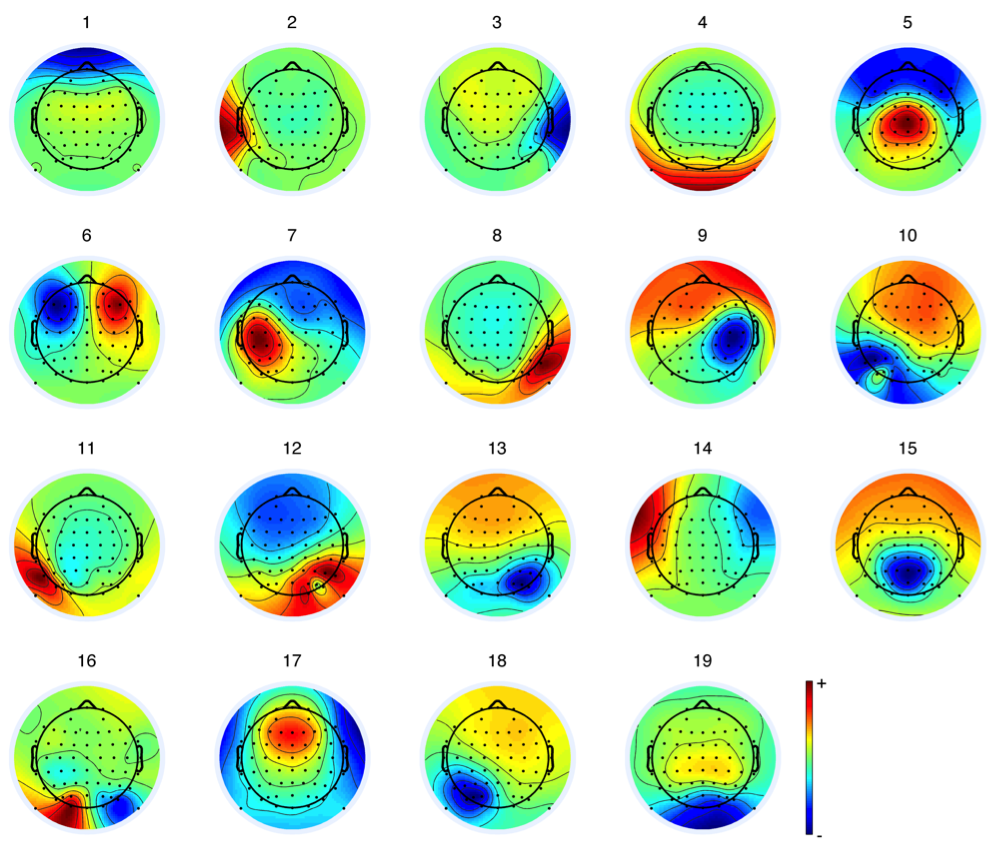

In [23]:
SELECTED_ICS =[3,4,5,6,7,8,9,10,11,12,14,16,17,18]
len(SELECTED_ICS)

14

In [24]:
matrices = your_path + '/HENAO ISAZA VERÓNICA/Data/FiltrosLab/filtroespacial_lab.mat'
M = sio.loadmat(matrices)
A = M["A"]
W = M["W"]
eeg_ejemplo=mne.io.read_epochs_eeglab(your_path + '/HENAO ISAZA VERÓNICA/Data/FiltrosLab/EEG_filtroespacial.set')
lab_ch_names = copy.deepcopy(eeg_ejemplo.ch_names)
print(len(lab_ch_names),'canales:',lab_ch_names)
print(W.shape)

Extracting parameters from /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/FiltrosLab/EEG_filtroespacial.set...
Not setting metadata
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Ready.
62 canales: ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'I1', 'O1', 'OZ', 'O2', 'I2']
(19, 62)


<ipython-input-24-eaa5ee4eb362>:5: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  eeg_ejemplo=mne.io.read_epochs_eeglab(your_path + '/HENAO ISAZA VERÓNICA/Data/FiltrosLab/EEG_filtroespacial.set')


In [25]:
eeg_ejemplo._data.shape

(59, 62, 2500)

## Edades para clasificacion

In [26]:
df=pd.read_csv(your_path + '/HENAO ISAZA VERÓNICA/Data/META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv',index_col='Unnamed: 0')

In [27]:
ages = set(df['Age'].tolist())
ages

{'20-25',
 '25-30',
 '30-35',
 '35-40',
 '55-60',
 '60-65',
 '65-70',
 '70-75',
 '75-80'}

In [28]:
def get_age(x):
  low,high = x.split('-')
  low = int(low)
  high = int(high)
  return np.mean([low,high])

def get_age_group(x):
  if x >= 60:
    return 'AdultoMayor'
  else:
    return 'Adulto'

In [29]:
df['AgeNumber'] = np.vectorize(get_age)(df['Age'])

In [30]:
df['AgeGroup'] = np.vectorize(get_age_group)(df['AgeNumber'])

In [31]:
df

,Gender_ 1=female_2=male,Age,Handedness,Education,DRUG,DRUG_0=negative_1=Positive,Unnamed: 7,Smoking,"Smoking_num_(Non-smoker=1, Occasional Smoker=2, Smoker=3)",SKID_Diagnoses,SKID_Diagnoses 1,SKID_Diagnoses 2,Comments_SKID_assessment,Hamilton_Scale,BSL23_sumscore,BSL23_behavior,AUDIT,Standard_Alcoholunits_Last_28days,Alcohol_Dependence_In_1st-3rd_Degree_relative,Relationship_Status,AgeNumber,AgeGroup
sub-032311,2,20-25,right,Gymnasium,negative,0.0,NaN,non-smoker,1.0,none,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,NaN,NaN,12.0,47,No,No,22.5,Adulto
sub-032309,2,20-25,right,Gymnasium,negative,0.0,NaN,occasional smoker,2.0,none,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,NaN,NaN,12.0,45,Yes,Yes,22.5,Adulto
sub-032382,2,25-30,right,Gymnasium,negative,0.0,NaN,occasional smoker,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.0,12,unknown,Yes,27.5,Adulto
sub-032302,1,20-25,right,Gymnasium,negative,0.0,NaN,non-smoker,1.0,none,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,3.0,NaN,NaN,1.0,0,No,No,22.5,Adulto
sub-032315,2,20-25,right,Gymnasium,negative,0.0,NaN,non-smoker,1.0,none,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,2.0,NaN,NaN,7.0,22,No,No,22.5,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-032304,2,25-30,right,Gymnasium,negative,0.0,NaN,non-smoker,1.0,none,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,4.0,0.0,1.0,1,No,No,27.5,Adulto
sub-032439,2,20-25,left,Gymnasium,negative,0.0,NaN,non-smoker,1.0,none,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,"suspected diagnosis: panic disorder, alcohol a...",1.0,4.0,1.0,5.0,18,no,no,22.5,Adulto
sub-032440,2,25-30,left,Gymnasium,negative,0.0,NaN,non-smoker,1.0,none,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,5.0,2.0,1.0,3.0,29,no,yes,27.5,Adulto
sub-032441,2,25-30,right,Gymnasium,negative,0.0,NaN,non-smoker,1.0,none,#CODE:300.29 #DESC: Mild Specific phobia #SPEC...,NaN,subclinical specific phobia,3.0,3.0,1.0,3.0,"16,5",no,yes,27.5,Adulto


In [32]:
df = df.to_dict(orient='index')

## Guardar

In [33]:
mats_set_path = your_path + '/HENAO ISAZA VERÓNICA/Data/Datos_mat_Preprocesados/'
mats_vhdr_path = your_path + '/HENAO ISAZA VERÓNICA/Data/Datos_mat_Crudos/'
import traceback

In [34]:
errores = []
overwrite = False
lista_de_archivos = [archivos_set,archivos_vhdr]
for archivos  in lista_de_archivos:
  for archivo in archivos:
    try:
      if '.vhdr' in archivo:
        mpath = mats_vhdr_path
        sujeto = os.path.split(archivo)[-1].replace('.vhdr','')
      elif '.set' in archivo:
        mpath = mats_set_path
        sujeto = os.path.split(archivo)[-1].replace('.set','').replace('_'+condition,'')
      filename = mpath+sujeto+'.mat'
      if not os.path.isfile(filename) or overwrite:
        additional_info = df[sujeto]
        additional_info['subject'] = sujeto
        sio.savemat(filename,preprocesamiento_lemon(archivo,W_lab=W,lab_channels=lab_ch_names,additional_info=additional_info))
      else:
        print('Ya existe',filename)
    except:
      print('Error para',archivo)
      print(traceback.format_exc())

      errores.append((archivo,      traceback.format_exc()))

    #break

print('Errores',errores)

Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_mat_Preprocesados/sub-032301.mat
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_mat_Preprocesados/sub-032302.mat
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_mat_Preprocesados/sub-032303.mat
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_mat_Preprocesados/sub-032305.mat
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_mat_Preprocesados/sub-032304.mat
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_mat_Preprocesados/sub-032307.mat
Ya existe /content/drive/MyDrive/Fundamentos de Deep learning/Proyecto/HENAO ISAZA VERÓNICA/Data/Datos_mat_Preprocesados/sub-032306.mat
Ya existe /content/drive/MyDrive/Fundamen

## Ejemplo entrada al modelo

In [35]:
dummyset_path = your_path + '/HENAO ISAZA VERÓNICA/Data/Datos_mat_Preprocesados/sub-032301.mat'
dummyset = sio.loadmat(dummyset_path)
nchannels_set,npoints_set,nepochs_set = np.dstack(dummyset['segments']).shape
dummyset_continuo = np.hstack(dummyset['segments'])
dummyset_S_continuo = dummyset['W'] @ (dummyset_continuo)
print(nchannels_set,npoints_set,nepochs_set)
dummyset_S_epocas = dummyset_S_continuo.reshape((dummyset_S_continuo.shape[0],npoints_set,nepochs_set),order='F')
dummyset_S_epocas.shape

54 1000 238


(19, 1000, 238)

In [36]:
dummyvhdr_path = your_path + '/HENAO ISAZA VERÓNICA/Data/Datos_mat_Crudos/sub-032301.mat'
dummyvhdr = sio.loadmat(dummyvhdr_path)
nchannels_vhdr,npoints_vhdr,nepochs_vhdr = np.dstack(dummyvhdr['segments']).shape
dummyvhdr_continuo = np.hstack(dummyvhdr['segments'])
dummyvhdr_S_continuo = dummyvhdr['W'] @ (dummyvhdr_continuo)
print(nchannels_vhdr,npoints_vhdr,nepochs_vhdr)
dummyvhdr_S_epocas = dummyvhdr_S_continuo.reshape((dummyvhdr_S_continuo.shape[0],npoints_vhdr,nepochs_vhdr),order='F')
dummyvhdr_S_epocas.shape

56 1000 232


(19, 1000, 232)